# **DATA IMPORT**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)
print("Original Shape:", df.shape)

Original Shape: (102599, 26)


In [113]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,2005,1018.0,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

# **DATA WRANGLING**

In [7]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [27]:
df = df.drop_duplicates()

In [55]:
if 'neighbourhood group' in df.columns:
    df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn'})

In [56]:
for col in ['house_rules','license']:
    if col in df.columns:
        df = df.drop(columns=[col])

In [57]:
for col in df.columns:
    if 'price' in col.lower() or 'service' in col.lower():
        df[col] = (
            df[col].astype(str)
            .str.replace(r'[\$,]', '', regex=True)
            .replace('nan', pd.NA)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [69]:
df.rename(columns = {
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace = True)

In [70]:
df = df.dropna()

In [68]:
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

In [67]:
for col in ['id','host id','Construction year','calculated host listings count','availability 365']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [71]:
if 'availability 365' in df.columns:
    df = df[df['availability 365'] <= 365]

print("Cleaned Shape:", df.shape)

Cleaned Shape: (81242, 24)


In [72]:
df.duplicated().value_counts()

,count
False,81242


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81242 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81242 non-null  object        
 1   NAME                            81242 non-null  object        
 2   host id                         81242 non-null  object        
 3   host_identity_verified          81242 non-null  object        
 4   host name                       81242 non-null  object        
 5   neighbourhood group             81242 non-null  object        
 6   neighbourhood                   81242 non-null  object        
 7   lat                             81242 non-null  float64       
 8   long                            81242 non-null  float64       
 9   country                         81242 non-null  object        
 10  country code                    81242 non-null  object        
 11  instan

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [74]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81242.000000,81242.000000,81242.000000,81242.00000,81242.000000,81242.000000,81242.000000,81242.000000,81242,81242.000000,81242.000000,81242.000000,81242.000000
mean,40.727256,-73.948263,0.497464,2012.48987,626.625760,125.326211,7.418047,32.010303,2019-06-21 03:51:10.027817984,1.390924,3.286305,7.106792,135.037148
min,40.504560,-74.249840,0.000000,2003.00000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982070,0.000000,2007.00000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721250,-73.953590,0.000000,2012.00000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930480,1.000000,2017.00000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.00000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056391,0.050625,0.499997,5.76077,331.762832,66.355878,28.366255,51.665773,NaN,1.761280,1.278717,29.854202,128.464648



Q1: Different Property Types
room type
Entire home/apt    42930
Private room       36590
Shared room         1614
Hotel room           108
Name: count, dtype: int64


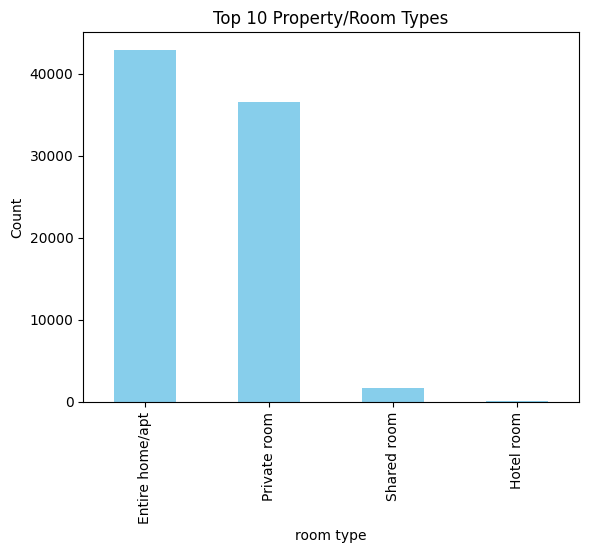

In [75]:
print("\nQ1: Different Property Types")
for col in ['property_type','room type']:
    if col in df.columns:
        print(df[col].value_counts())
        df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
        plt.title("Top 10 Property/Room Types")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


Q2: Neighbourhood Group with Most Listings
neighbourhood group
Brooklyn         33709
Manhattan        33541
Queens           10946
Bronx             2241
Staten Island      805
Name: count, dtype: int64


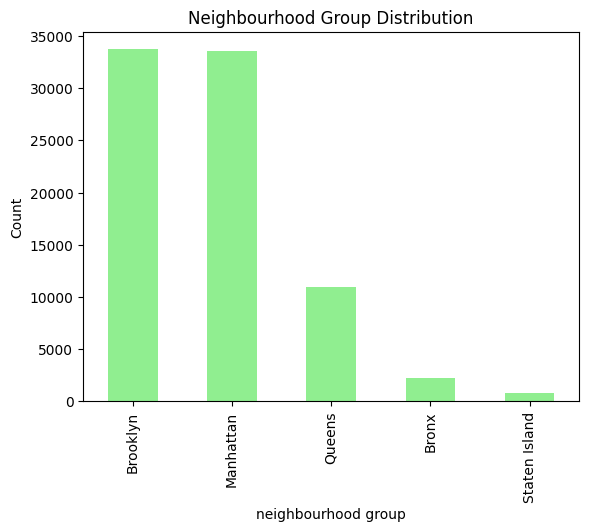

In [89]:
print("\nQ2: Neighbourhood Group with Most Listings")
if 'neighbourhood group' in df.columns:
    print(df['neighbourhood group'].value_counts())
    df['neighbourhood group'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title("Neighbourhood Group Distribution")
    plt.ylabel("Count")
    plt.show()


Q3: Neighbourhood Group with Highest Average Price
neighbourhood group
Bronx            630.429273
Queens           629.858122
Brooklyn         627.548192
Manhattan        624.494797
Staten Island    622.247205
Name: price_$, dtype: float64


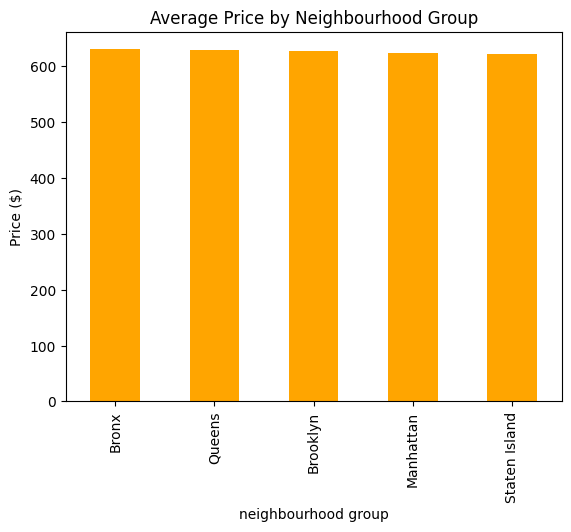

In [90]:
print("\nQ3: Neighbourhood Group with Highest Average Price")
price_col = [c for c in df.columns if 'price' in c.lower()][0]
if 'neighbourhood group' in df.columns:
    avg_price = df.groupby('neighbourhood group')[price_col].mean().sort_values(ascending=False)
    print(avg_price)
    avg_price.plot(kind='bar', color='orange')
    plt.title("Average Price by Neighbourhood Group")
    plt.ylabel("Price ($)")
    plt.show()


Q4: Correlation between Construction Year and Price
Correlation: -0.0052603565514655086


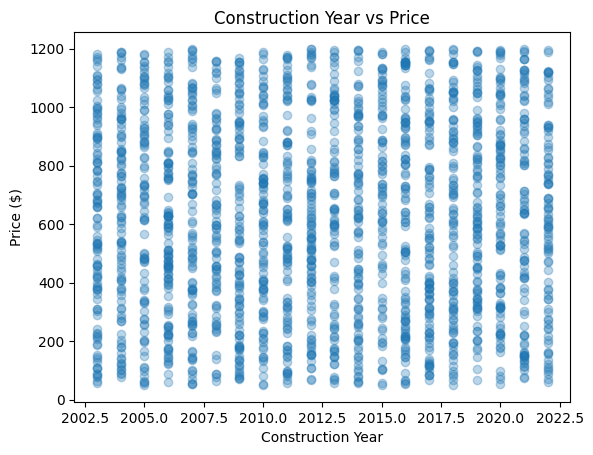

In [96]:
print("\nQ4: Correlation between Construction Year and Price")
if 'Construction year' in df.columns:
    corr = df['Construction year'].corr(df[price_col])
    print("Correlation:", corr)
    sample = df.sample(min(2000,len(df)), random_state=42)
    plt.scatter(sample['Construction year'], sample[price_col], alpha=0.3)
    plt.title("Construction Year vs Price")
    plt.xlabel("Construction Year")
    plt.ylabel("Price ($)")
    plt.show()


Q5: Top 10 Hosts by Listing Count


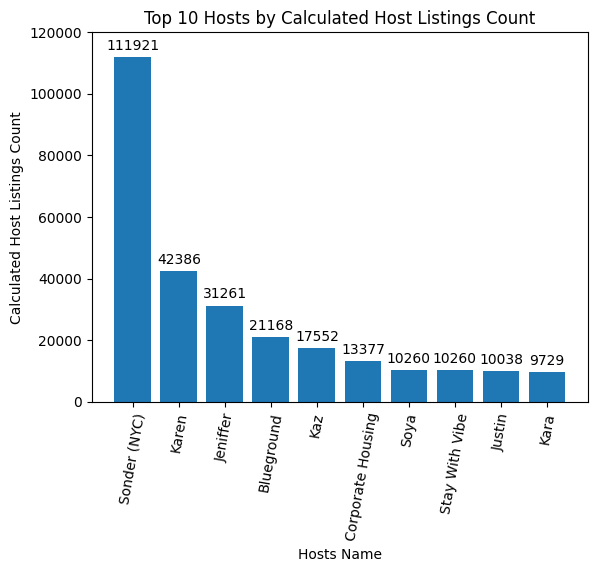

In [100]:
print("\nQ5: Top 10 Hosts by Listing Count")
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');


Q6: Verified vs Unverified Host Reviews
Verified Hosts Avg Review: nan
Unverified Hosts Avg Review: nan


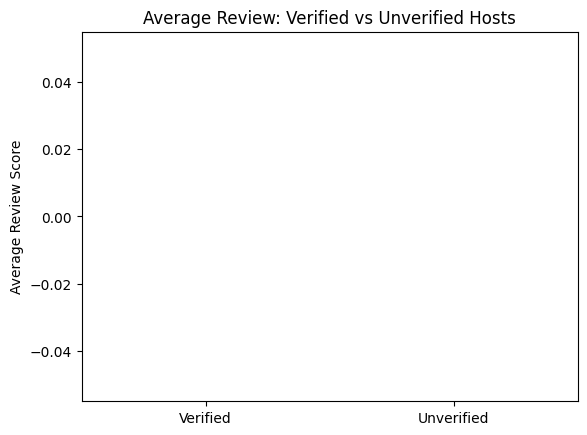

In [107]:
print("\nQ6: Verified vs Unverified Host Reviews")
if 'host_identity_verified' in df.columns:
    review_col = [c for c in df.columns if 'review' in c.lower()][0]
    verified_avg = df[df['host_identity_verified']=='t'][review_col].mean()
    unverified_avg = df[df['host_identity_verified']=='f'][review_col].mean()
    print("Verified Hosts Avg Review:", verified_avg)
    print("Unverified Hosts Avg Review:", unverified_avg)
    sns.barplot(x=['Verified','Unverified'], y=[verified_avg, unverified_avg], hue=['Verified','Unverified'], palette="Set2", legend=False)
    plt.title("Average Review: Verified vs Unverified Hosts")
    plt.ylabel("Average Review Score")
    plt.show()


Q7: Correlation between Price and Service Fee
Correlation: 0.9999909005366617


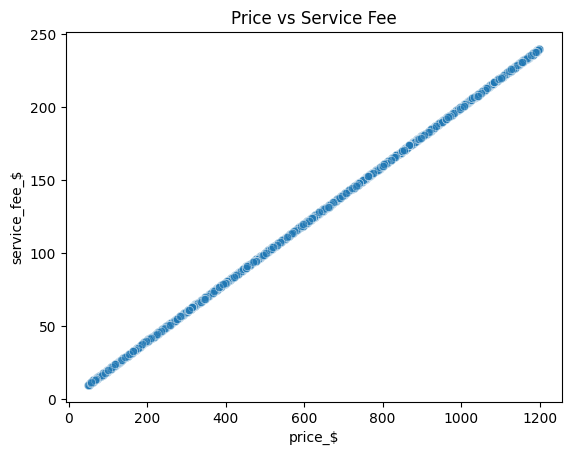

In [108]:
print("\nQ7: Correlation between Price and Service Fee")
service_col = [c for c in df.columns if 'service_fee_$' in c.lower()]
if service_col:
    corr = df[price_col].corr(df[service_col[0]])
    print("Correlation:", corr)
    sample = df.sample(min(2000,len(df)), random_state=42)
    sns.scatterplot(x=price_col, y=service_col[0], data=sample, alpha=0.5)
    plt.title("Price vs Service Fee")
    plt.show()


Q8: Average Review by Neighbourhood Group and Room Type
room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                      40.779582         NaN     33.620743    16.770115
Brooklyn                   36.676189   19.166667     28.792340    23.553512
Manhattan                  24.584831   92.436170     34.483677    32.160991
Queens                     40.240961   17.500000     38.328989    23.250000
Staten Island              46.874092         NaN     30.774026     2.428571


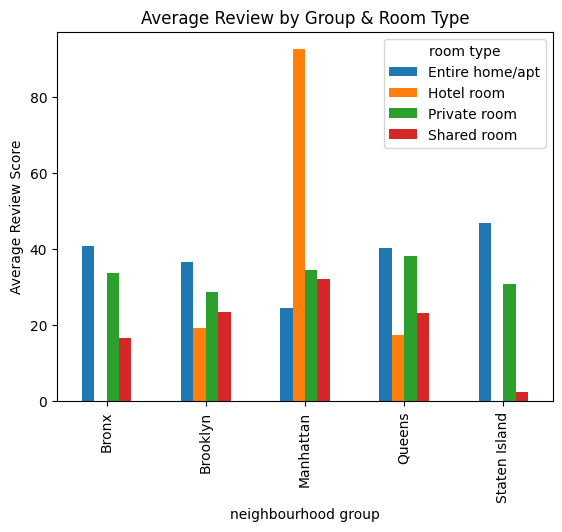

In [109]:
print("\nQ8: Average Review by Neighbourhood Group and Room Type")
if 'neighbourhood group' in df.columns and 'room type' in df.columns:
    review_col = [c for c in df.columns if 'review' in c.lower()][0]
    avg_reviews = df.groupby(['neighbourhood group','room type'])[review_col].mean().unstack()
    print(avg_reviews)
    avg_reviews.plot(kind='bar')
    plt.title("Average Review by Group & Room Type")
    plt.ylabel("Average Review Score")
    plt.show()


Q9: Correlation between Host Listings Count and Availability
Correlation: 0.14857327574146945


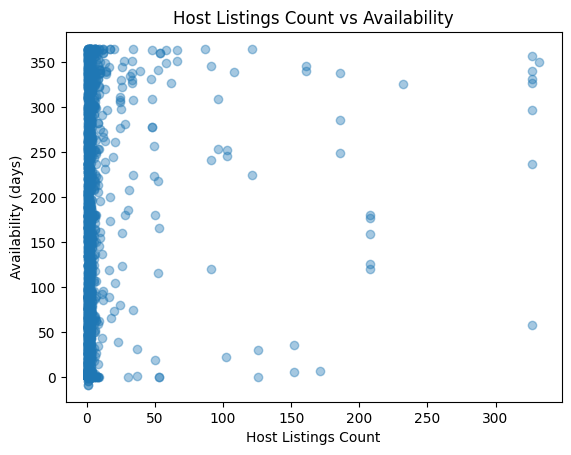

In [112]:
print("\nQ9: Correlation between Host Listings Count and Availability")
if 'calculated host listings count' in df.columns and 'availability 365' in df.columns:
    corr = df['calculated host listings count'].corr(df['availability 365'])
    print("Correlation:", corr)
    sample = df.sample(min(2000,len(df)), random_state=42)
    plt.scatter(sample['calculated host listings count'], sample['availability 365'], alpha=0.4)
    plt.title("Host Listings Count vs Availability")
    plt.xlabel("Host Listings Count")
    plt.ylabel("Availability (days)")
    plt.show()